# <center><b>ERO1</b></center> #

A. Breton A., N. Crespel, A. Dugot, V. Goguyer-Lalande, N. Labernardiere

#### <center><b>CONTEXTE</b></center> ####

Actuellement nous avons donc <b>19 graphes eulériens</b> (un pour chaque quartier) ainsi qu'<b>un chemin eulérien pour chacun</b> d'entre eux. Nous allons donc pouvoir commencer le déneigement mais avant cela, nous devons réfléchir à comment procéder. <br />Tout d'abord, nous faisons le choix de continuer à ne travailler qu'avec 19 graphes car, comme nous l'avions calculé lors du procédé de drones nous avons <b>1.8 * 2800 / 19</b> soit environ <b>265km</b> à déneiger par secteurs. Le calcul a été défini de la manière suivante : <br/>2800 représente la somme totale en km des chemins eulériens, 19 est le nombre de quartiers mais le plus important est le 1.8, celui nous sert à estimer la longueur réelle car nous travaillons avec des graphes non orientés. Il nous faut pas oublier les routes à double sens. <br /><br />De plus, comme l'on peut le voir dans le fichier <i>rentabilite.ipynb</i>, nous en avons déduis qu'il était plus rentable d'utiliser les déneigeuses de <b>type 2</b> pour tout graphe ayant un chemin eulérien de <b>plus de 240km</b>. On aurait alors <b>8 quartiers</b> affectés avec des déneigeuses de type 1 et <b>11 quartiers</b> avec des déneigeuses type 2. <br />Par conséquent, en choisissant ce modèle, si les déneigeuses travaillent de nuit on peut en déduire qu'il faudrait environ <b>3 jours</b> pour déneiger entièrement Montréal.

#### <br /><center><b>DENEIGEMENT DES 5 QUARTIERS</b></center> ####

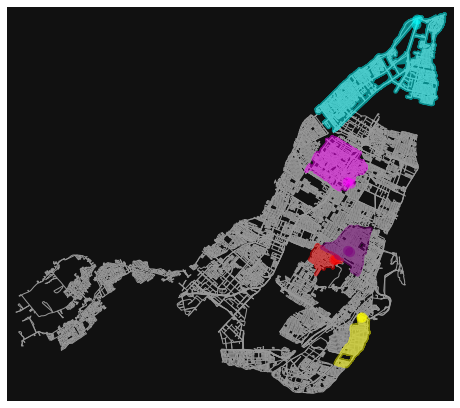

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
import osmnx as ox
import pickle
import networkx as nx

with open('eulerized_districts.pkl', 'rb') as f:
    eulerized_districts = pickle.load(f)

# G11 : Outremont
# G17 : Verdun
# G16 : Saint-Léonard
# G13 : Rivière-des-Prairies-Pointe-aux-Trembles
# G6 : Le Plateau-Mont-Royal

G11 = eulerized_districts[10]
G17 = eulerized_districts[16]
G16 = eulerized_districts[15]
G13 = eulerized_districts[12]
G6 = eulerized_districts[5]

for graph in eulerized_districts:
    nx.set_edge_attributes(graph, 0, 'length')

G = nx.compose_all([G11, G17, G16, G13, G6])
montreal = nx.compose_all(eulerized_districts[0:19])

with open('eulerian_paths.pkl', 'rb') as f:
    eulerian_paths = pickle.load(f)

P11 = eulerian_paths[10]
P17 = eulerian_paths[16]
P16 = eulerian_paths[15]
P13 = eulerian_paths[12]
P6 = eulerian_paths[5]
P11 = [P11[i][0] for i in range(len(P11))]
P17 = [P17[i][0] for i in range(len(P17))]
P16 = [P16[i][0] for i in range(len(P16))]
P13 = [P13[i][0] for i in range(len(P13))]
P6 = [P6[i][0] for i in range(len(P6))]
colors = ['red', 'yellow', 'magenta', 'cyan', 'purple']

ox.plot_graph_routes(montreal, [P11, P17, P16, P13, P6], route_colors=colors,node_size=0)

#### <center><b>CONCLUSION</b></center> ####

On retrouve ainsi, ci-dessus, les 5 parcours eulériens qui vont être effectués par les déneigeuses. Sachant que pour Outremont, Verdun, Saint-Léonard et Le Plateau-Mont-Royal on aura des déneigeuses de type 1 et pour Rivière-des-Prairies-Pointe-aux-Trembles une déneigeuse type 2. <br /> <br /> Nous sommes fiers du produit final que nous avons réussi à obtenir car il permet d'assurer un déneigement selon nous efficace et à moindre coût dans chacun de ces quartiers. 